#EXERCISE 9.1

###Resolution of the Travelling Salesman Problem via genetic algorithm

The Travelling Salesman Problem (TSP henceforth) consists of a salesman and a set of $N$ cities with positions $\vec{c}_i$. The salesman **has to visit each one of the cities starting from a certain one (e.g. the hometown) and returning to the same city**, whith the shortest path possible.

This problem is NP-hard, therefore one efficent way of solving this, is to find an approximate solution (a path that is "short enough") by exploring the solution space.

In order to do so, we explore the solution space getting inpiration from the natural mechanisms of evolution and natural selection: a genetic algorithm.



1.   The solution space is explored by creating a random "population" of solutions (a.k.a each individual is a permutations of the possible path)
2.   "Natural" Selection is then enforced on the population by verifying their adaptability to the problem, computing the cost function (path length) and rewarding with better "reproduction rate" (probability to pass its informations to the next generation) those individuals who offer a better solution
3.   Information is then passed to the next generation (by crossbreeding: mixing casually two halves of two solutions in order to get a new individual)
4.   In order to avoid getting trapped in local minima of the cost function, or pitfalling into genetic stagnation of the population, casual mutation of the individuals (paths) are enforced

then the cycle $2 → 4$ starts anew.

After a number of generations, the best individual is chosen as an approximate optimal solution

With these points in mind, i wrote a code that solved the TSP using a genetic algorithm:


*   As a cost function i chose $
L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|
$ (sum of distance between each city $x_i$ and the next $x_{i+1}$)
*   As a selection operator 2.) I opted to randomly choose on the ordered population (of dimensions $M$) for reproduction individuals with index  $j = int(M*r^p)$, where $r$ is a random-uniform number in [0;1) and I chose $p = 2$ observig the results.

As mutation operators 4.), i wrote 3 functions which act on the paths of the population in the following ways:


*   Swap a pair of randomly chosen cities in the path, excluding the first.
*   Shift a sequence of $m$ cities $n$ positions further on the path (in position $j + n$, where $j$ was the original position of the block of $m$ cities). This operator acts therefore also as a swap of two blocks of $m$ cities placed $n$ cities apart.
*   Inversion of a sequence of $m$ cities in position $j$.

In all of these operators, $m, n$ and $j$ are random-uniform numbers in $[1;N)$, where $N$ is the path length.

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
from matplotlib.cm import ScalarMappable
warnings.filterwarnings('ignore')

results = pd.read_csv('notable_results.dat', delim_whitespace=True)

The algorithm was initally tested by performing a random search of the best path of cities positioned randomly inside a square of side 100 centerd on the origin. This search was performed with **NO CROSSBREEDING** and only mutation of the solution population, with a mutation probability of 0.3 for each mutation type. The search effetively found progressively better solutions, settling on a best path proposal with:

In [62]:
print("best solution found with random search after ", results['GENS'][0], " generations:  L = ", results['COST'][0])

best solution found with random search after  100  generations:  L =  1511.67


The algorithm was then fully tested on:



*   Cities randomly placed on a circle of $r = 50$ centered on (0;0).
*   Cities randomly placed inside a square of $l=100$ centered on (0;0),

In both cases I used a population size of 200 solutions, with crossbreeding probability 0.5 and mutation probability 0.1 for each mutation type.

###Cities on a circular path

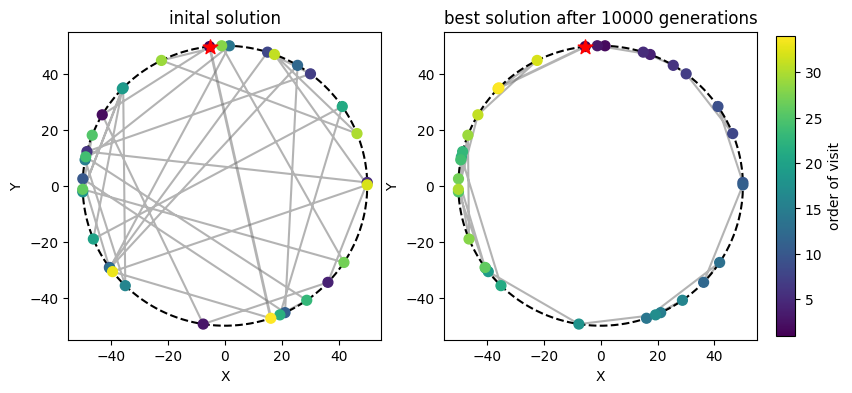

best solution found after  10000  generations:  L =  604.939


In [60]:
colors = np.linspace(0, 1, 34)

Circle_init_path = pd.read_csv('circle_TSP_init.dat', delim_whitespace=True, header=None)
Circle_best_path = pd.read_csv('circle_TSP_best.dat', delim_whitespace=True, header=None)
Circle_init_path.columns = ['ID', 'X', 'Y']
Circle_best_path.columns = ['ID', 'X', 'Y']

fig, ax = plt.subplots(1, 2, figsize=(9.5, 4))

x = np.linspace(-50, 50, 1000)
c_up = np.sqrt(2500 - x**2)
c_dw = - np.sqrt(2500 - x**2)

ax[0].scatter(Circle_init_path['X'], Circle_init_path['Y'], c=colors, cmap='viridis', s=50)
ax[0].plot(Circle_init_path['X'], Circle_init_path['Y'], c='dimgrey', zorder=0, alpha=0.5)
ax[0].plot([Circle_init_path['X'].iloc[0], Circle_init_path['X'].iloc[-1]], [Circle_init_path['Y'].iloc[0], Circle_init_path['Y'].iloc[-1]], color='dimgrey', zorder=0, alpha=0.5, linewidth=2)
ax[0].plot(x, c_up, color = 'black', linestyle = '--', zorder = 0)
ax[0].plot(x, c_dw, color = 'black', linestyle = '--', zorder = 0)
ax[0].scatter(Circle_init_path['X'].iloc[0], Circle_init_path['Y'].iloc[0], s=120, color = 'red', marker='*')
ax[0].set(xlabel = 'X', ylabel = 'Y', title = 'inital solution')

ax[1].scatter(Circle_best_path['X'], Circle_best_path['Y'], c=colors, cmap='viridis', s=50)
ax[1].plot(Circle_best_path['X'], Circle_best_path['Y'], c='dimgrey', zorder=0, alpha=0.5)
ax[1].plot([Circle_best_path['X'].iloc[0], Circle_best_path['X'].iloc[-1]], [Circle_best_path['Y'].iloc[0], Circle_best_path['Y'].iloc[-1]], color='dimgrey', zorder=0, alpha=0.5, linewidth=2)
ax[1].plot(x, c_up, color = 'black', linestyle = '--', zorder = 0)
ax[1].plot(x, c_dw, color = 'black', linestyle = '--', zorder = 0)
ax[1].scatter(Circle_init_path['X'].iloc[0], Circle_init_path['Y'].iloc[0], s=120, color = 'red', marker='*')
ax[1].set(xlabel = 'X', ylabel = 'Y', title = 'best solution after 10000 generations')

plt.subplots_adjust(right=0.85)

norm = plt.Normalize(vmin=1, vmax=34)
sm = ScalarMappable(cmap=plt.cm.viridis, norm=norm)
cbar_ax = fig.add_axes([0.87, 0.12, 0.02, 0.75])
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label("order of visit")

plt.show()
plt.close()

print("best solution found after ", results['GENS'][2], " generations:  L = ", results['COST'][2])

The solution found was not the absolute optimal solution, but the improvement from the inital condition is effective, and we can see that, comparing with a circumference of 314.159 (which is the superior limit to the best path), the final result only overshoots the optimal path by a factor of 2.

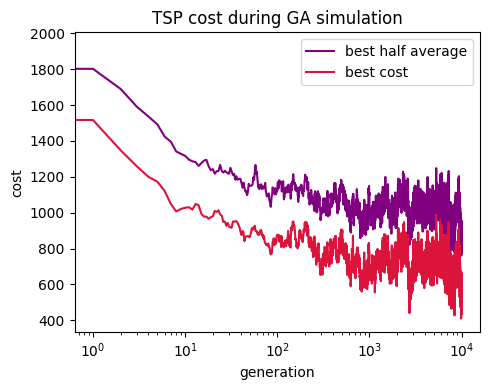

In [67]:
cost_circle = pd.read_csv('TSP_GA_cost_circle.dat', delim_whitespace=True, header=None)

fig, ax = plt.subplots(1, 1, figsize=(5, 4))

ax.plot(cost_circle[0], color = 'purple', label = 'best half average')
ax.plot(cost_circle[2], color = 'crimson', label = 'best cost')
ax.set(xlabel='generation', ylabel='cost', title='TSP cost during GA simulation', xscale='log')
ax.legend()

plt.tight_layout()
plt.show()
plt.close()

By analizing the cost function evolution during the simulation, we can see that sometimes it reached a better solution than the last obtained. This is due to the randomness of the mutation, selection, and most importantly, crossbreeding operators, that never ensure the survival of the best solution.

For example, every time the best solution is selected for crossbreeding, it has a 50% chance of getting destroyed by creating a crossbreeding pair, which can yield a better solution by propagating its genetic information, but can also delete optimal solutions only to create suboptimal ones. Therefore, a combination of low selection and high crosspairing (bad luck!) can result in the optimal solution deletion!

While this is a very realistic and natural outcome in actual genetic evolution, we could hope to surpass nature's design by implementing a simple fix that always clones 1 copy of the best individual (or individuals!) for the next generation. This would guarantee that the red graph shown above remains monotone decreasing at all times..

###Cities inside a square:

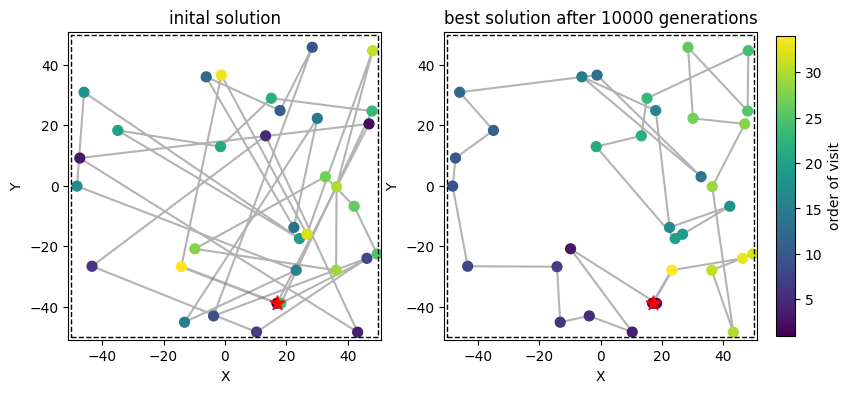

best solution found after  10000  generations:  L =  801.509


In [61]:
colors = np.linspace(0, 1, 34)

Square_init_path = pd.read_csv('square_TSP_init.dat', delim_whitespace=True, header=None)
Square_best_path = pd.read_csv('square_TSP_best.dat', delim_whitespace=True, header=None)
Square_init_path.columns = ['ID', 'X', 'Y']
Square_best_path.columns = ['ID', 'X', 'Y']

fig, ax = plt.subplots(1, 2, figsize=(9.5, 4))

square = plt.Rectangle((-50, -50), 100, 100, edgecolor='black', facecolor='none', linestyle='--')
square2 = plt.Rectangle((-50, -50), 100, 100, edgecolor='black', facecolor='none', linestyle='--')

ax[0].scatter(Square_init_path['X'], Square_init_path['Y'], c=colors, cmap='viridis', s=50)
ax[0].plot(Square_init_path['X'], Square_init_path['Y'], c='dimgrey', zorder=0, alpha=0.5)
ax[0].plot([Square_init_path['X'].iloc[0], Square_init_path['X'].iloc[-1]], [Square_init_path['Y'].iloc[0], Square_init_path['Y'].iloc[-1]], color='dimgrey', zorder=0, alpha=0.5, linewidth=2)
ax[0].add_patch(square)
ax[0].scatter(Square_init_path['X'].iloc[0], Square_init_path['Y'].iloc[0], s=120, color = 'red', marker='*')
ax[0].set(xlabel = 'X', ylabel = 'Y', title = 'inital solution', xlim = [-51, 51], ylim = [-51, 51])

ax[1].scatter(Square_best_path['X'], Square_best_path['Y'], c=colors, cmap='viridis', s=50)
ax[1].plot(Square_best_path['X'], Square_best_path['Y'], c='dimgrey', zorder=0, alpha=0.5)
ax[1].plot([Square_best_path['X'].iloc[0], Square_best_path['X'].iloc[-1]], [Square_best_path['Y'].iloc[0], Square_best_path['Y'].iloc[-1]], color='dimgrey', zorder=0, alpha=0.5, linewidth=2)
ax[1].add_patch(square2)
ax[1].scatter(Square_init_path['X'].iloc[0], Square_init_path['Y'].iloc[0], s=120, color = 'red', marker='*')
ax[1].set(xlabel = 'X', ylabel = 'Y', title = 'best solution after 10000 generations', xlim = [-51, 51], ylim = [-51, 51])

plt.subplots_adjust(right=0.85)

norm = plt.Normalize(vmin=1, vmax=34)
sm = ScalarMappable(cmap=plt.cm.viridis, norm=norm)
cbar_ax = fig.add_axes([0.87, 0.12, 0.02, 0.75])
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label("order of visit")

plt.show()
plt.close()

print("best solution found after ", results['GENS'][1], " generations:  L = ", results['COST'][1])

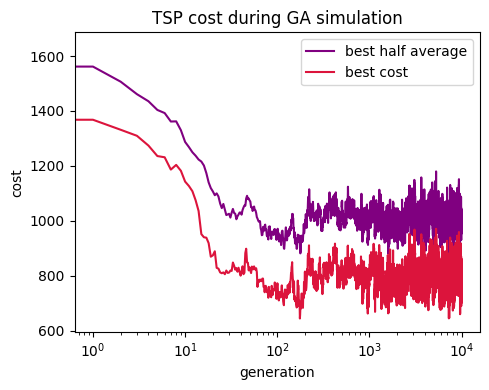

In [68]:
cost_square = pd.read_csv('TSP_GA_cost_square.dat', delim_whitespace=True, header=None)

fig, ax = plt.subplots(1, 1, figsize=(5, 4))

ax.plot(cost_square[0], color = 'purple', label = 'best half average')
ax.plot(cost_square[2], color = 'crimson', label = 'best cost')
ax.set(xlabel='generation', ylabel='cost', title='TSP cost during GA simulation', xscale='log')
ax.legend()

plt.tight_layout()
plt.show()
plt.close()

In both the plots above the affirmations made for the circular case are confirmed for the square one!

In [70]:
results

,ALG_TYPE,CONFIG,GENS,COST
0,RANDOM_SEARCH,SQUARE,100,1511.670
1,GENETIC_ALG,SQUARE,10000,801.509
2,GENETIC_ALG,CIRCLE,10000,604.939
3,RANDOM_SEARCH,CIRCLE,10000,1256.160


Finally, performing a random search for the same number of generations shows that, while this approach can yield results (as the final path found is faster than the original one), it is far slower than the full genetic algorithm (using crossbreeding), showing the importance of ensuring the spread of the information regarding good solutions to following generations, which improves its survivability (but does not guarantee it! As said before) and improves the probability of moving towards the minima (possibly local, possibly global) of the given problem.